<img src='images/director_shot.jpeg'>

# Microsoft Studios: A New Frontier

**Author:** E. Berke Tezcan
***

## Overview

Microsoft decided to create a new movie studio to compete with other companies in the space but they are not familiar with the movie industry or what kinds of movies they should be creating for this studio to be successful. Our task was to explore box office data in order to find at least three takeaways from the movie industry for Microsoft to act on.

There are many different factors that go into making a movie "successful". One can argue that the most important metric for a successful movie is the financial data such as revenue and profit. There would not be any business case if the movies did not make any money after all... However, we believe that the public reaction to the movie is almost as important as the financial data, especially for a new company entering this space. A movie may return a profit but if the moviegoers do not like the actual production, this will jeopardize the future success of the studio by hurting their brand, even if the movies they are making may be better in the future. For sustained growth, we believe that providing high quality productions liked by the masses that are profitable is the way forward. With this in mind, we came up with the following metrics: A movie should return at least a 25% profit and should have a higher average rating than 6.5. 

In 2009, James Cameron's Avatar changed the movie industry forever. The technologies they developed and used to make CGI elements look as realistic as possible ended up being adopted by many movies and defining the past decade of the movie industry. Keeping this in mind, we believe that the data from 2009-2019 is the most relevant for Microsoft's business case. Therefore we limited our analysis to the past decade (2009-2019). Throughout the analysis we looked at the importance of what genre a movie is, how the production budget may affect the financial success and popularity of the movie as well as exploring whether there was an optimal time to release a movie to capitalize on.

## Data Understanding & Preparation

For our data analysis we explored data from the largest movie databases online. These were namely: Box Office Mojo, IMDb, TMDb, The Numbers (TN) and Rotten Tomatoes. In order to pick which datasets we were going to use, we had to perform an exploratory data analysis (EDA) first. Our EDA began with comparing and contrasting the datasets that were provided to ensure that we kept as many data points as possible after the datasets were filtered and merged. This analysis also allowed us to define the success parameters for a movie: 25% profit and higher than a 6.5 rating. In the end, our analysis used data from IMDb and TN only since we ended up with the most amount of reliable data points with them.

### Importing Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
%matplotlib inline

In [2]:
folder ='zippedData/'
os.listdir(folder)

['bom.movie_gross.csv.gz',
 'imdb.name.basics.csv.gz',
 'imdb.title.akas.csv.gz',
 'imdb.title.basics.csv.gz',
 'imdb.title.crew.csv.gz',
 'imdb.title.principals.csv.gz',
 'imdb.title.ratings.csv.gz',
 'rt.movie_info.tsv.gz',
 'rt.reviews.tsv.gz',
 'tmdb.movies.csv.gz',
 'tn.movie_budgets.csv.gz']

In [3]:
bom_movie_gross = pd.read_csv(f'{folder}bom.movie_gross.csv.gz')
imdb_name_basics = pd.read_csv(f'{folder}imdb.name.basics.csv.gz')
imdb_title_akas = pd.read_csv(f'{folder}imdb.title.akas.csv.gz')
imdb_title_basics = pd.read_csv(f'{folder}imdb.title.basics.csv.gz')
imdb_title_crew = pd.read_csv(f'{folder}imdb.title.crew.csv.gz')
imdb_title_principals = pd.read_csv(f'{folder}imdb.title.principals.csv.gz')
imdb_title_ratings = pd.read_csv(f'{folder}imdb.title.ratings.csv.gz')
rt_movie_info = pd.read_csv(f'{folder}rt.movie_info.tsv.gz', delimiter='\t')
rt_reviews = pd.read_csv(f'{folder}rt.reviews.tsv.gz', delimiter='\t', encoding='latin1')
tmdb_movies = pd.read_csv(f'{folder}tmdb.movies.csv.gz',index_col=0)
tn_movie_budgets = pd.read_csv(f'{folder}tn.movie_budgets.csv.gz')

In [4]:
tmdb_movies.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [5]:
tmdb_movies['id'].value_counts()

292086    3
463839    3
11976     3
391872    3
416572    3
         ..
356987    1
350846    1
479871    1
500353    1
524288    1
Name: id, Length: 25497, dtype: int64

In [6]:
tn_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [7]:
bom_movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [8]:
imdb_name_basics.head()

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [9]:
imdb_title_akas.head()

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


In [10]:
imdb_title_principals.head()

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


In [11]:
imdb_title_crew.head()

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


In [12]:
imdb_title_ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [13]:
rt_movie_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [14]:
rt_reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [15]:
tmdb_movies.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [16]:
imdb_title_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


### EDA to determine which movie df to use (looking at Sample Size, n)

EDA to figure out which dataframe has most movies for the past decade 2009 on excluding 2020. I excluded 2020 since it was an outlier year due to the pandemic and chose my start year as 2009 since the movie industry changed in a major way after the technology used in Avatar was adopted widely that year.

In [17]:
movies_financials = pd.merge(imdb_title_basics, bom_movie_gross, how="left", left_on='primary_title', right_on='title')
movies_financials.isna().sum()
# len(tmdb_movies) #26517
# len(bom_movie_gross) #3387
# len(imdb_title_basics) #146144


tconst                  0
primary_title           0
original_title         21
start_year              0
runtime_minutes     31739
genres               5408
title              142780
studio             142783
domestic_gross     142804
foreign_gross      144103
year               142780
dtype: int64

In [18]:
imdb_title_basics[(imdb_title_basics['start_year']>=2009) & 
                  (imdb_title_basics['start_year']!=2020)] #937 rows in 2020


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


In [19]:
imdb_title_basics['start_year'].min()

2010

In [20]:
imdb_title_basics['start_year'].unique()

array([2013, 2019, 2018, 2017, 2012, 2010, 2011, 2015, 2021, 2016, 2014,
       2020, 2022, 2023, 2024, 2026, 2025, 2115, 2027], dtype=int64)

In [21]:
tmdb_movies['release_year'] = tmdb_movies['release_date'].map(lambda x: x[:4])
tmdb_movies['release_year'].dtype

dtype('O')

Changing the release_year column for tmdb movies to integer values so that I can sort by them.

In [22]:
tmdb_movies['release_year'] = tmdb_movies['release_year'].astype('int64')
df = tmdb_movies[(tmdb_movies['release_year']>=2009) & (tmdb_movies['release_year']!=2020)]
df['release_year'].unique()

array([2010, 2009, 2012, 2011, 2014, 2013, 2015, 2017, 2016, 2018, 2019],
      dtype=int64)

In [23]:
len(df) #26,330

26330

In [24]:
df.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,release_year
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,2010
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,2010
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,2010
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,2010
5,"[12, 14, 10751]",32657,en,Percy Jackson & the Olympians: The Lightning T...,26.691,2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229,2010


### Checking for duplicates

In [25]:
df[df.duplicated()]

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,release_year
2536,"[12, 28, 878]",20526,en,TRON: Legacy,13.459,2010-12-10,TRON: Legacy,6.3,4387,2010
2673,"[18, 10749]",46705,en,Blue Valentine,8.994,2010-12-29,Blue Valentine,6.9,1677,2010
2717,"[35, 18, 14, 27, 9648]",45649,en,Rubber,8.319,2010-09-01,Rubber,5.9,417,2010
2803,"[35, 18]",46829,en,Barney's Version,7.357,2011-01-14,Barney's Version,7.2,210,2011
2919,[18],54602,en,Skateland,5.938,2011-05-13,Skateland,5.4,16,2011
...,...,...,...,...,...,...,...,...,...,...
26481,"[35, 18]",270805,en,Summer League,0.600,2013-03-18,Summer League,4.0,3,2013
26485,"[27, 53]",453259,en,Devils in the Darkness,0.600,2013-05-15,Devils in the Darkness,3.5,1,2013
26504,"[27, 35, 27]",534282,en,Head,0.600,2015-03-28,Head,1.0,1,2015
26510,[99],495045,en,Fail State,0.600,2018-10-19,Fail State,0.0,1,2018


It looks like there is 1004 rows that are duplicated. I will check a couple id numbers to make sure that the duplicated method is running correctly.

In [26]:
df[df['id']==46829]

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,release_year
289,"[35, 18]",46829,en,Barney's Version,7.357,2011-01-14,Barney's Version,7.2,210,2011
2803,"[35, 18]",46829,en,Barney's Version,7.357,2011-01-14,Barney's Version,7.2,210,2011


In [27]:
df[df['id']==54602]

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,release_year
386,[18],54602,en,Skateland,5.938,2011-05-13,Skateland,5.4,16,2011
2919,[18],54602,en,Skateland,5.938,2011-05-13,Skateland,5.4,16,2011


### Dropping duplicates

In [28]:
df = df.drop_duplicates(keep='first')
df[df['id']==46829] #spot-checking to make sure that the duplicates have been dropped/

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,release_year
289,"[35, 18]",46829,en,Barney's Version,7.357,2011-01-14,Barney's Version,7.2,210,2011


### Checking for missing/placeholder values

In [29]:
df.isna().sum()

genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
release_year         0
dtype: int64

In [30]:
df[df['title']==None]

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,release_year


### EDA to figure out which financial df to use (looking at Sample Size, n) 

In [31]:
len(tn_movie_budgets) #5782
# len(bom_movie_gross) #3387

5782

Even though the amount of data points in the bom_movie_gross is almost half of tn_movie_budgets, depending on the merges I used it still could have resulted in a higher sample size compared to tn_movie budgets so I wanted to test the different merges to see how many data points were remaining.

In [32]:
#cleaned tmdb_movies (df) + bom_movie_gross
release_profit = pd.merge(df, bom_movie_gross, how='inner', left_on='title', right_on='title')
len(release_profit)

2450

In [33]:
#cleaned tmdb_movies (df) + tn_movie_budgets
release_profit = pd.merge(df, tn_movie_budgets, how='inner', left_on='title', right_on='movie')
len(release_profit)

2156

Changing the financial information to integers so that I can manipulate them.

In [34]:
tn_movie_budgets['worldwide_gross'] = tn_movie_budgets['worldwide_gross'].map(lambda x: x[1:].replace(',',''))
tn_movie_budgets['worldwide_gross'] = tn_movie_budgets['worldwide_gross'].astype('int64')
tn_movie_budgets['worldwide_gross'].dtype

dtype('int64')

Wrote a function to quickly re-apply the above logic and change the financial information to integer values.

In [35]:
def convertdollarstoint(df, col):
    df[col] = df[col].map(lambda x: x[1:].replace(',',''))
    df[col] = df[col].astype('int64')
    return df

In [36]:
convertdollarstoint(df = tn_movie_budgets, col = 'domestic_gross')

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000",760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000",241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000",42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000",459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000",620181382,1316721747
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",0,0
5778,79,"Apr 2, 1999",Following,"$6,000",48482,240495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000",1338,1338
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",0,0


In [37]:
convertdollarstoint(df = tn_movie_budgets, col = 'production_budget')

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0
5778,79,"Apr 2, 1999",Following,6000,48482,240495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0


In [38]:
tn_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


Creating additional columns for profit and profit %.

In [39]:
tn_movie_budgets['profit'] = tn_movie_budgets['worldwide_gross'] - tn_movie_budgets['production_budget']
tn_movie_budgets['profit %'] = (((tn_movie_budgets['worldwide_gross'] - tn_movie_budgets['production_budget'])
                                 /tn_movie_budgets['production_budget'])*100).round(0)
tn_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,profit %
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,553.0
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,155.0
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,-57.0
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,324.0
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,315.0


Creating an additional column to isolate the months for the release date question I'll be exploring.

In [40]:
tn_movie_budgets['release_month'] = tn_movie_budgets['release_date'].map(lambda x: x[:3])
tn_movie_budgets['release_year'] = tn_movie_budgets['release_date'].map(lambda x: x[-4:])
tn_movie_budgets['release_year'] = tn_movie_budgets['release_year'].astype('int64')
tn_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,profit %,release_month,release_year
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,553.0,Dec,2009
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,155.0,May,2011
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,-57.0,Jun,2019
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,324.0,May,2015
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,315.0,Dec,2017


### Exploring ratings for movies prior to merge to see distribution of ratings

<function matplotlib.pyplot.show(close=None, block=None)>

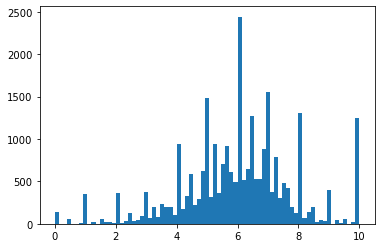

In [41]:
plt.hist(x=tmdb_movies['vote_average'], bins='auto')
plt.show

In [42]:
#quick check to make sure that there are no movies with 0 votes
tmdb_movies[tmdb_movies['vote_count']==0] 

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,release_year


All movies seem to have votes on their ratings which means we can use the vote_average information without having to fill any NaN values.

In [43]:
tt = tmdb_movies[tmdb_movies['release_year']>=2009]
tt['vote_average'].agg('mean')

5.986039269302343

In [44]:
tt['vote_average'].agg('median')

6.0

In [45]:
tt['vote_average'].agg('mode')

0    6.0
dtype: float64

### Defining a "successful movie" - larger than x% profit and higher than x rating & Filtering by successful movies.

It seems like the mean, median and mode values for the movie ratings converge to a 6.0 rating. Since Microsoft is just opening up this studio they will want to not only turn a profit but make movies that the public likes. A movie can turn a profit but not be liked by the public. So at the end of the day what will matter is the public opinion of this new studio as well as the profitability for sustained success. Therefore, we are going to be filtering the information by this information as well since we would like the movie to do better than just "average".

In [46]:
tn_movie_budgets['release_year'].unique()

array([2009, 2011, 2019, 2015, 2017, 2018, 2007, 2012, 2013, 2010, 2016,
       2014, 2006, 2008, 2005, 1997, 2004, 1999, 1995, 2003, 2001, 2020,
       2002, 1998, 2000, 1991, 1994, 1996, 1993, 1992, 1988, 1990, 1989,
       1978, 1981, 1984, 1982, 1985, 1980, 1963, 1987, 1986, 1983, 1979,
       1977, 1970, 1969, 1976, 1965, 1962, 1964, 1959, 1966, 1974, 1956,
       1975, 1973, 1960, 1967, 1968, 1971, 1951, 1972, 1961, 1946, 1944,
       1953, 1954, 1957, 1952, 1930, 1939, 1925, 1950, 1948, 1958, 1943,
       1940, 1945, 1947, 1938, 1927, 1949, 1955, 1936, 1937, 1941, 1942,
       1933, 1935, 1931, 1916, 1929, 1934, 1915, 1920], dtype=int64)

We decided to filter the dataset by the last decade (2009-2019) as the older movies have very little, if at all, meaning to the analysis we will be looking at. The target audiences for the older movies were different and the culture has changed significantly since then. We also think that since Avatar was a very influential movie in terms of the CGI modeling technologies it used that was a good place to start for "modern-day" movies. 2020 was also filtered out since it was an outlier year with the pandemic causing there to be shutdowns of nearly all businesses including movie theaters.

In [47]:
tn_filtered = tn_movie_budgets[(tn_movie_budgets['profit %']>=25)&(tn_movie_budgets['release_year']>2008)
                               &(tn_movie_budgets['release_year']<2020)]
tn_filtered

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,profit %,release_month,release_year
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,553.0,Dec,2009
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,155.0,May,2011
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,324.0,May,2015
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,315.0,Dec,2017
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,571.0,Dec,2015
...,...,...,...,...,...,...,...,...,...,...
5685,86,"Jul 7, 2017",A Ghost Story,100000,1594798,2769782,2669782,2670.0,Jul,2017
5717,18,"Nov 12, 2010",Tiny Furniture,50000,391674,424149,374149,748.0,Nov,2010
5737,38,"Mar 18, 2016",Krisha,30000,144822,144822,114822,383.0,Mar,2016
5748,49,"Sep 1, 2015",Exeter,25000,0,489792,464792,1859.0,Sep,2015


In [48]:
merged_df = pd.merge(tn_filtered, tmdb_movies, how='left', left_on='movie', right_on='original_title')

In [49]:
merged_df.head()

,id_x,release_date_x,movie,production_budget,domestic_gross,worldwide_gross,profit,profit %,release_month,release_year_x,genre_ids,id_y,original_language,original_title,popularity,release_date_y,title,vote_average,vote_count,release_year_y
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,553.0,Dec,2009,"[28, 12, 14, 878]",19995.0,en,Avatar,26.526,2009-12-18,Avatar,7.4,18676.0,2009.0
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,155.0,May,2011,"[12, 28, 14]",1865.0,en,Pirates of the Caribbean: On Stranger Tides,30.579,2011-05-20,Pirates of the Caribbean: On Stranger Tides,6.4,8571.0,2011.0
2,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,324.0,May,2015,"[28, 12, 878]",99861.0,en,Avengers: Age of Ultron,44.383,2015-05-01,Avengers: Age of Ultron,7.3,13457.0,2015.0
3,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,315.0,Dec,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,571.0,Dec,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
len(merged_df)

1550

In [51]:
merged_df[merged_df['movie'].duplicated()]

,id_x,release_date_x,movie,production_budget,domestic_gross,worldwide_gross,profit,profit %,release_month,release_year_x,genre_ids,id_y,original_language,original_title,popularity,release_date_y,title,vote_average,vote_count,release_year_y
7,9,"Nov 17, 2017",Justice League,300000000,229024295,655945209,355945209,119.0,Nov,2017,"[28, 12, 14, 878]",141052.0,en,Justice League,34.953,2017-11-17,Justice League,6.2,7510.0,2017.0
9,10,"Nov 6, 2015",Spectre,300000000,200074175,879620923,579620923,193.0,Nov,2015,"[28, 12, 80]",206647.0,en,Spectre,30.318,2015-11-06,Spectre,6.4,6719.0,2015.0
31,39,"May 14, 2010",Robin Hood,210000000,105487148,322459006,112459006,54.0,May,2010,"[12, 28, 53]",375588.0,en,Robin Hood,39.975,2018-11-21,Robin Hood,5.8,1194.0,2018.0
33,42,"Feb 16, 2018",Black Panther,200000000,700059566,1348258224,1148258224,574.0,Feb,2018,"[28, 12, 14, 878]",284054.0,en,Black Panther,44.140,2018-02-16,Black Panther,7.4,12365.0,2018.0
36,45,"Dec 16, 2016",Rogue One: A Star Wars Story,200000000,532177324,1049102856,849102856,425.0,Dec,2016,"[28, 12, 878]",330459.0,en,Rogue One: A Star Wars Story,21.401,2016-12-16,Rogue One: A Star Wars Story,7.5,9296.0,2016.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1524,60,"Apr 23, 2009",Home,500000,15433,44793168,44293168,8859.0,Apr,2009,[878],496256.0,en,Home,0.600,2017-04-30,Home,4.0,1.0,2017.0
1531,72,"Apr 28, 2017",Sleight,250000,3930990,3934450,3684450,1474.0,Apr,2017,"[18, 53, 28, 878]",347882.0,en,Sleight,5.664,2017-04-28,Sleight,5.3,367.0,2017.0
1535,10,"Jul 20, 2012",Burn,225000,1109276,1109276,884276,393.0,Jul,2012,[99],139948.0,en,Burn,1.958,2012-11-01,Burn,7.1,14.0,2012.0
1546,38,"Mar 18, 2016",Krisha,30000,144822,144822,114822,383.0,Mar,2016,[18],323929.0,en,Krisha,5.288,2016-03-18,Krisha,6.8,86.0,2016.0


In [52]:
test = merged_df.drop_duplicates(keep='first')
test[test.duplicated()]

,id_x,release_date_x,movie,production_budget,domestic_gross,worldwide_gross,profit,profit %,release_month,release_year_x,genre_ids,id_y,original_language,original_title,popularity,release_date_y,title,vote_average,vote_count,release_year_y


In [53]:
len(test)

1446

In [54]:
test.isna().sum()

id_x                   0
release_date_x         0
movie                  0
production_budget      0
domestic_gross         0
worldwide_gross        0
profit                 0
profit %               0
release_month          0
release_year_x         0
genre_ids            331
id_y                 331
original_language    331
original_title       331
popularity           331
release_date_y       331
title                331
vote_average         331
vote_count           331
release_year_y       331
dtype: int64

Since there were 331 data points missing from the above merged tables I decided to try out and see how many missing data the imdb tables merged with tn_movie_budgets would result in.

In [55]:
imdb = pd.merge(imdb_title_basics, imdb_title_ratings, left_on='tconst', right_on='tconst')
imdb.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [56]:
len(imdb)

73856

In [57]:
imdb.loc[imdb['start_year']>2008, 'averagerating']

0        7.0
1        7.2
2        6.9
3        6.1
4        6.5
        ... 
73851    6.2
73852    8.7
73853    8.5
73854    6.6
73855    6.5
Name: averagerating, Length: 73856, dtype: float64

In [58]:
imdb['averagerating'].agg('mean')

6.332728552859619

In [59]:
imdb['averagerating'].agg('median')

6.5

In [60]:
imdb['averagerating'].agg('mode')

0    7.0
dtype: float64

Per the imdb datasets it seems like the average rating median is at 6.5 compared to the 6.0 shown above.

In [61]:
tn_filtered[tn_filtered.duplicated()]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,profit %,release_month,release_year


Since there can be movies with the same title, one way to weed out the duplicates is to use multiple columns for merging. I decided to use the release year as well as the title to ensure that there were no duplicated/inaccurate information in the resulting dataframe.

In [62]:
test2 = pd.merge(tn_filtered, imdb, left_on=['movie', 'release_year'], right_on=['original_title', 'start_year'])

In [63]:
test2[test2.duplicated()]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,profit %,release_month,release_year,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes


In [64]:
len(test2)

983

Since I am testing out the merge between imdb and tn_filtered, I adjusted my success metric of being higher than the median average to 6.5.

In [65]:
imdb_tn_filtered = test2[test2['averagerating']>6.5]

In [66]:
imdb_tn_filtered.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
profit               0
profit %             0
release_month        0
release_year         0
tconst               0
primary_title        0
original_title       0
start_year           0
runtime_minutes      2
genres               0
averagerating        0
numvotes             0
dtype: int64

Since this merge did not result in as many null values, and I have more of a complete dataframe I decided to use imdb_title_basics, imdb_title_ratings and tn_movie_budgets combination as my main dataframe throughout the analysis.

In [67]:
len(imdb_tn_filtered)

493

In [68]:
imdb_tn_filtered.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,profit %,release_month,release_year,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,155.0,May,2011,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy",6.6,447624
1,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,324.0,May,2015,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",7.3,665594
2,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,583.0,Apr,2018,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",8.5,670926
4,10,"Nov 6, 2015",Spectre,300000000,200074175,879620923,579620923,193.0,Nov,2015,tt2379713,Spectre,Spectre,2015,148.0,"Action,Adventure,Thriller",6.8,352504
5,11,"Jul 20, 2012",The Dark Knight Rises,275000000,448139099,1084439099,809439099,294.0,Jul,2012,tt1345836,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,"Action,Thriller",8.4,1387769


In [69]:
#conversion of x and y ticks into millions to clean up the graphs we are going to be producing in the data modeling phase.
from matplotlib.ticker import FuncFormatter

#Source: https://stackoverflow.com/questions/61330427/set-y-axis-in-millions
#The two args are the value and tick position

def millions(x, pos):
    return '%1.0fM' % (x * 1e-6)
formatter = FuncFormatter(millions)

## Data Modeling

A movie's success can be definitely affected by its genre, production budget and its release date. People often times look at the genre of a movie before anything else and make a snap decision whether they would like to see it or not. Similarly, a movie's production budget will affect this decision-making process since some movie-goers may want to see movies with higher quality production, better directors and actors etc. compared to indie movies. Lastly, depending on the release month movie-goers may not be able to go to the movies as much due to having to be in school or having to care for their school-aged children during the school year. So for our analysis we decided to take a deeper dive into these three areas to see if there are clear trends that Microsoft may use strategically for their movie creation process.

### Question 1: How does release date affect a movie's success?


#### Release Month vs. Total Revenue

In [70]:
medians = imdb_tn_filtered.groupby('release_month')['worldwide_gross'].median().reset_index()
medians.sort_values(by='worldwide_gross', ascending=False)

order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

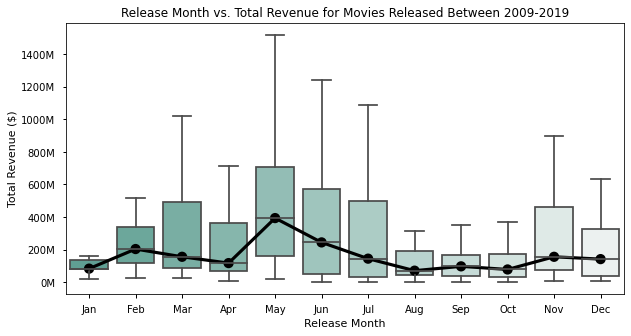

In [71]:
with plt.style.context('seaborn-notebook'):
    fig, ax = plt.subplots(figsize=(10,5))
    sns.boxplot(x=imdb_tn_filtered['release_month'], y=imdb_tn_filtered['worldwide_gross'], order=order,
            showfliers=False, ax=ax, palette="light:#5A9_r")
    sns.pointplot(data=medians, x='release_month', y='worldwide_gross', 
                  order=order, ax=ax, color='black')
    ax.set_xlabel('Release Month')
    ax.set_ylabel('Total Revenue ($)')
    ax.set_title('Release Month vs. Total Revenue for Movies Released Between 2009-2019')
    ax.yaxis.set_major_formatter(formatter);

From this graph we can see that historically, the months of May and June were when the most revenue was generated. The black line in this graph represents the median revenue values while the boxplot gives an idea on the spread of the data.

#### Release Month vs. Total Profit

In [72]:
medians = imdb_tn_filtered.groupby('release_month')['profit'].median().reset_index()

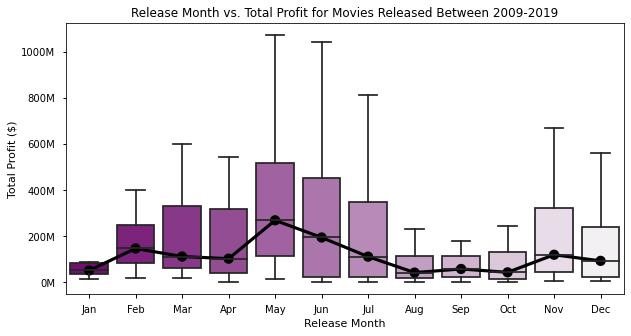

In [73]:
with plt.style.context('seaborn-notebook'):
    fig, ax = plt.subplots(figsize=(10,5))
    sns.boxplot(x=imdb_tn_filtered['release_month'], y=imdb_tn_filtered['profit'], 
            order=order, showfliers=False, ax=ax, palette='light:purple_r')
    sns.pointplot(data=medians, x='release_month', y='profit', order=order, ax=ax, color='black')
    ax.set_xlabel('Release Month')
    ax.set_ylabel('Total Profit ($)')
    ax.set_title('Release Month vs. Total Profit for Movies Released Between 2009-2019')
    ax.yaxis.set_major_formatter(formatter);

Similar to the previous graph that shows the release month vs. total revenue, this graph shows a similar trend that suggests the most profitable movies were the ones that were released in May followed closely by June.

#### Our Recommendation for Microsoft

Microsoft should strongly consider releasing their movies in the summer months preferably in May or June. As the school year comes to an end, these months allow for more movie-goers to enjoy the movies in their local theater and this directly translates into maximizing revenue and profit.

### Question 2: How does the genre of the movie affect its success?

In [74]:
imdb_tn_filtered['genres'] = imdb_tn_filtered['genres'].map(lambda x: x.strip().split(','))
imdb_tn_filtered.head()

<ipython-input-74-048b0847e17d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb_tn_filtered['genres'] = imdb_tn_filtered['genres'].map(lambda x: x.strip().split(','))


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,profit %,release_month,release_year,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,155.0,May,2011,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"[Action, Adventure, Fantasy]",6.6,447624
1,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,324.0,May,2015,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"[Action, Adventure, Sci-Fi]",7.3,665594
2,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,583.0,Apr,2018,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"[Action, Adventure, Sci-Fi]",8.5,670926
4,10,"Nov 6, 2015",Spectre,300000000,200074175,879620923,579620923,193.0,Nov,2015,tt2379713,Spectre,Spectre,2015,148.0,"[Action, Adventure, Thriller]",6.8,352504
5,11,"Jul 20, 2012",The Dark Knight Rises,275000000,448139099,1084439099,809439099,294.0,Jul,2012,tt1345836,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,"[Action, Thriller]",8.4,1387769


I need to check to make sure that one movie doesn't have more than 3 genres at the same time since my code is geared towards that.

In [75]:
for x in imdb_tn_filtered['genres']:
    if len(x)>3:
        print(len(x))

In [76]:
imdb_tn_filtered['genre1'] = imdb_tn_filtered['genres'].map(lambda x: x[0].strip())
imdb_tn_filtered['genre2'] = imdb_tn_filtered['genres'].map(lambda x: x[1].strip() if (len(x)>=2) else np.NaN)
imdb_tn_filtered['genre3'] = imdb_tn_filtered['genres'].map(lambda x: x[2].strip() if (len(x)==3) else np.NaN)

<ipython-input-76-b72c3f5e9305>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb_tn_filtered['genre1'] = imdb_tn_filtered['genres'].map(lambda x: x[0].strip())
<ipython-input-76-b72c3f5e9305>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb_tn_filtered['genre2'] = imdb_tn_filtered['genres'].map(lambda x: x[1].strip() if (len(x)>=2) else np.NaN)
<ipython-input-76-b72c3f5e9305>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

In [77]:
genre1_counts = {}

for genre in imdb_tn_filtered['genre1']:
    if genre not in genre1_counts.keys():
        genre1_counts[genre]=1
    else:
        genre1_counts[genre]+=1
    
genre2_counts = {}

for genre in imdb_tn_filtered['genre2']:
    if genre not in genre2_counts.keys():
        genre2_counts[genre]=1
    else:
        genre2_counts[genre]+=1
        
genre3_counts = {}

for genre in imdb_tn_filtered['genre3']:
    if genre not in genre3_counts.keys():
        genre3_counts[genre]=1
    else:
        genre3_counts[genre]+=1
        
print(genre1_counts, genre2_counts, genre3_counts)

{'Action': 154, 'Adventure': 65, 'Drama': 92, 'Horror': 8, 'Family': 1, 'Comedy': 70, 'Biography': 59, 'Crime': 25, 'Animation': 5, 'Mystery': 3, 'Romance': 1, 'Thriller': 1, 'Documentary': 9} {'Adventure': 84, 'Thriller': 18, 'Animation': 36, 'Family': 10, 'Fantasy': 11, 'Crime': 41, 'Romance': 27, 'Mystery': 21, 'Comedy': 39, 'Sci-Fi': 11, 'Drama': 129, nan: 33, 'Western': 1, 'History': 3, 'Biography': 10, 'Sport': 3, 'Horror': 5, 'War': 2, 'Music': 6, 'Documentary': 3} {'Fantasy': 21, 'Sci-Fi': 46, 'Thriller': 52, nan: 139, 'Comedy': 47, 'Drama': 58, 'Animation': 14, 'Horror': 3, 'Family': 20, 'Musical': 3, 'History': 15, 'Biography': 3, 'Crime': 11, 'Mystery': 11, 'Western': 2, 'War': 3, 'Sport': 11, 'Music': 6, 'Romance': 27, 'Documentary': 1}


In [78]:
#code snippet from https://www.geeksforgeeks.org/python-combine-two-dictionary-adding-values-for-common-keys/ (Method #3)
import itertools
import collections

total_genre = collections.defaultdict(int)
for key, val in itertools.chain(genre1_counts.items(), genre2_counts.items()):
    total_genre[key] += val
       
total_genre

defaultdict(int,
            {'Action': 154,
             'Adventure': 149,
             'Drama': 221,
             'Horror': 13,
             'Family': 11,
             'Comedy': 109,
             'Biography': 69,
             'Crime': 66,
             'Animation': 41,
             'Mystery': 24,
             'Romance': 28,
             'Thriller': 19,
             'Documentary': 12,
             'Fantasy': 11,
             'Sci-Fi': 11,
             nan: 33,
             'Western': 1,
             'History': 3,
             'Sport': 3,
             'War': 2,
             'Music': 6})

In [79]:
#code snippet from https://www.geeksforgeeks.org/python-combine-two-dictionary-adding-values-for-common-keys/ (Method #3)
total_genre_counts = collections.defaultdict(int)
for key, val in itertools.chain(total_genre.items(), genre3_counts.items()):
    total_genre_counts[key] += val
total_genre_counts
del total_genre_counts[np.nan]

In [80]:
#code snippet from https://stackoverflow.com/questions/613183/how-do-i-sort-a-dictionary-by-value
total_genre_counts={k: v for k, v in sorted(total_genre_counts.items(), key=lambda item: item[1], reverse=True)}
total_genre_counts

{'Drama': 279,
 'Comedy': 156,
 'Action': 154,
 'Adventure': 149,
 'Crime': 77,
 'Biography': 72,
 'Thriller': 71,
 'Sci-Fi': 57,
 'Animation': 55,
 'Romance': 55,
 'Mystery': 35,
 'Fantasy': 32,
 'Family': 31,
 'History': 18,
 'Horror': 16,
 'Sport': 14,
 'Documentary': 13,
 'Music': 12,
 'War': 5,
 'Western': 3,
 'Musical': 3}

#### Most Produced Movie Genres

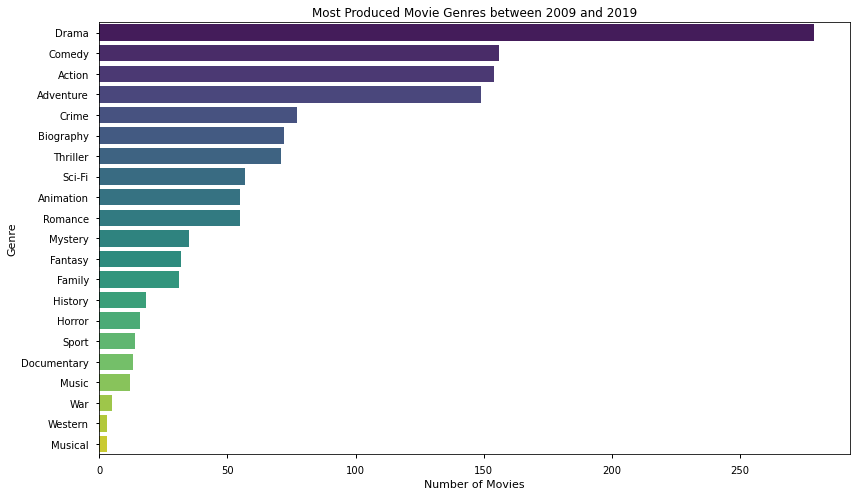

In [81]:
with plt.style.context('seaborn-notebook'):
    fig, ax = plt.subplots(figsize=(12,7))
    sns.barplot(x=list(total_genre_counts.values()), y= list(total_genre_counts.keys()), 
                orient='h', palette='viridis')
    ax.set_xlabel('Number of Movies')
    ax.set_ylabel('Genre')
    ax.set_title('Most Produced Movie Genres between 2009 and 2019')
    plt.tight_layout()
    fig.savefig('images/Most-Produced-Genre.png', transparent=False, facecolor='white');

As seen above, Drama was by far the most produced genre between 2009 and 2019 followed by Comedy, Action and Adventure.

#### Genre vs. Median Revenue

In [82]:
exploded_imdb_tn = imdb_tn_filtered.explode('genres')
exploded_imdb_tn.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,profit %,release_month,release_year,...,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,genre1,genre2,genre3
0,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,155.0,May,2011,...,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,Action,6.6,447624,Action,Adventure,Fantasy
0,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,155.0,May,2011,...,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,Adventure,6.6,447624,Action,Adventure,Fantasy
0,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,155.0,May,2011,...,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,Fantasy,6.6,447624,Action,Adventure,Fantasy
1,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,324.0,May,2015,...,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,Action,7.3,665594,Action,Adventure,Sci-Fi
1,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,324.0,May,2015,...,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,Adventure,7.3,665594,Action,Adventure,Sci-Fi


In [83]:
genre_revenue_order = exploded_imdb_tn.groupby('genres').median()['worldwide_gross'].sort_values(ascending=False).index

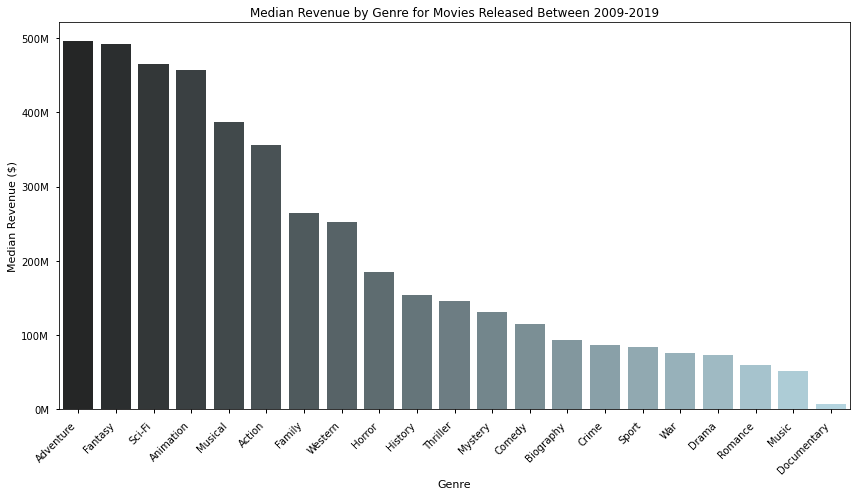

In [84]:
with plt.style.context('seaborn-notebook'):
    fig, ax = plt.subplots(figsize=(12,7))
    sns.barplot(x=exploded_imdb_tn['genres'], y=exploded_imdb_tn['worldwide_gross'], estimator=np.median, 
                ci=None, order=genre_revenue_order, palette="dark:lightblue")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45,ha='right')
    ax.set_ylabel('Median Revenue ($)')
    ax.set_xlabel('Genre')
    ax.set_title('Median Revenue by Genre for Movies Released Between 2009-2019')
    ax.yaxis.set_major_formatter(formatter)
    plt.tight_layout()
    fig.savefig('images/Rev-Genre.png', transparent=False, facecolor='white');

Even though our analysis shows that Drama was the highest produced genre in the past decade, this graph shows us that Drama is not the optimal choice for generating revenue. Here we see that Adventure, Fantasy, Sci-Fi and Animation movies tend to generate more revenue compared to the other genres. 

#### Genre vs. Median Profit

In [85]:
genre_profit_order = exploded_imdb_tn.groupby('genres').median()['profit'].sort_values(ascending=False).index

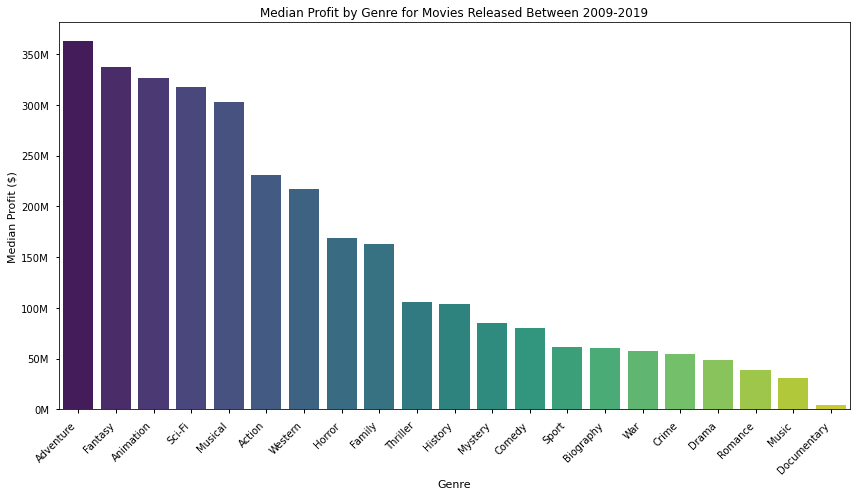

In [86]:
with plt.style.context('seaborn-notebook'):
    fig, ax = plt.subplots(figsize=(12,7))
    sns.barplot(x=exploded_imdb_tn['genres'], y=exploded_imdb_tn['profit'], estimator=np.median, 
                ci=None, order=genre_profit_order, palette='viridis')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45,ha='right')
    ax.set_ylabel('Median Profit ($)')
    ax.set_xlabel('Genre')
    ax.set_title('Median Profit by Genre for Movies Released Between 2009-2019')
    ax.yaxis.set_major_formatter(formatter)
    plt.tight_layout()
    fig.savefig('images/Prof-Genre.png', transparent=False, facecolor='white');

Similar to the relationship between genre and revenue, we see that the most profitable genres are Adventure, Fantasy, Animation and Sci-Fi even though they are not the ones most produced.

#### Our Recommendation for Microsoft

As we saw in the past decade, even though Drama was the most produced genre, followed by Comedy, the most profitable and high grossing movies tended to be Adventure, Fantasy, Animation and Sci-Fi movies. This presents a great opportunity for Microsoft. By focusing on these four key genres and incorporating them into their movies, Microsoft can make a great entry into the movie industry, gain popularity and build their brand while also generating the financial returns that they desire.

#### Genre vs. % ROI

In [87]:
exploded_imdb_tn['ROI %'] = (exploded_imdb_tn['worldwide_gross']/exploded_imdb_tn['production_budget'])*100

In [88]:
genre_roi_order = exploded_imdb_tn.groupby('genres').median()['ROI %'].sort_values(ascending=False).index

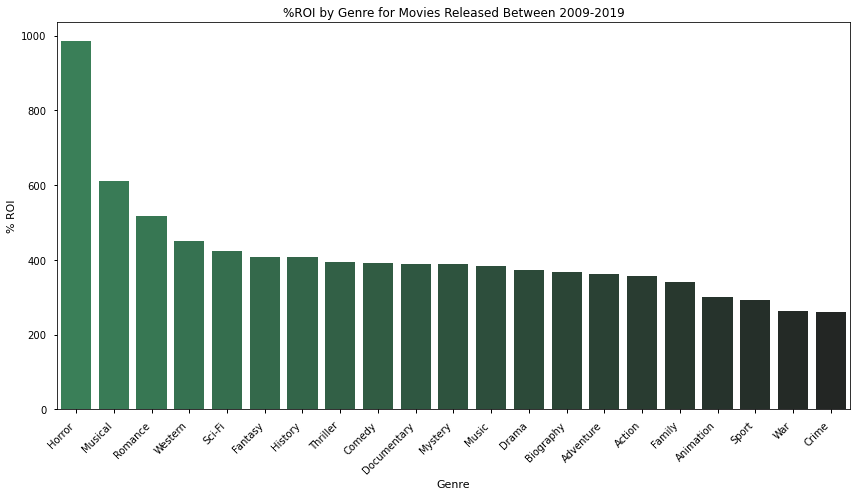

In [89]:
with plt.style.context('seaborn-notebook'):
    fig, ax = plt.subplots(figsize=(12,7))
    sns.barplot(x=exploded_imdb_tn['genres'], y=exploded_imdb_tn['ROI %'], estimator=np.median, ci=None, 
                order=genre_roi_order, palette='dark:seagreen_r')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45,ha='right')
    ax.set_ylabel('% ROI')
    ax.set_xlabel('Genre')
    ax.set_title('%ROI by Genre for Movies Released Between 2009-2019')
    plt.tight_layout()
    fig.savefig('images/ROI-Genre.png', transparent=False, facecolor='white');

#### Side Note for Microsoft

If Microsoft's financial targets are more aligned with return on investment (% ROI) rather than pure revenue or profits, then we recommend they produce Horror movies instead. Our analysis showed that Horror had a higher ROI percentage compared to any other genre as can be seen above. This means that a higher return can be achieved compared to what is spent on the production budget.

### Question 3: How does the production budget affect a movie's ratings and financial success?

In [90]:
a = imdb_tn_filtered
a['ROI %'] = (a['worldwide_gross']/a['production_budget'])*100

<ipython-input-90-5ea35b07874a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['ROI %'] = (a['worldwide_gross']/a['production_budget'])*100


In [91]:
a = tn_movie_budgets[tn_movie_budgets['release_year']>2008]
b = pd.merge(a, imdb, left_on=['movie', 'release_year'], right_on=['original_title', 'start_year'])

#### Production Budget vs. Average Movie Rating

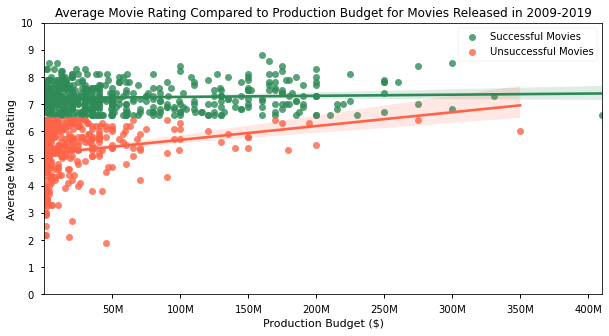

In [92]:
unsuccessful_df = b[(b['averagerating']<6.5) & (b['profit %']<25)]
with plt.style.context('seaborn-notebook'):
    fig, ax = plt.subplots(figsize=(10,5))
    sns.regplot(data=imdb_tn_filtered, x='production_budget', y='averagerating', 
                color='seagreen', ax=ax, label='Successful Movies')
    sns.regplot(data=unsuccessful_df, x='production_budget', y='averagerating', 
                color='tomato', ax=ax, label='Unsuccessful Movies')
    ax.legend()
    ax.set_xlabel('Production Budget ($)')
    ax.set_ylabel('Average Movie Rating')
    ax.set_ylim(0,10)
    ax.set_title('Average Movie Rating Compared to Production Budget for Movies Released in 2009-2019')
    ax.xaxis.set_major_formatter(formatter)
    ax.set_yticks(np.arange(0, 11, step=1));

As can be seen from the graph above, the successful movies as we defined them (higher than 25% profit and higher than a 6.5 rating) don't show a clear correlation between the production budget and the movie ratings while unsuccessful movies show a relatively higher correlation, but an overall weak one at that. This relationship debunks the assumption that as more money is spent on the movie, the more it will be liked by cinema fans. The relationship shown suggests that a movie studio does not need to have a high production budget for it to have higher movie ratings.

#### Production Budget vs. Total Revenue

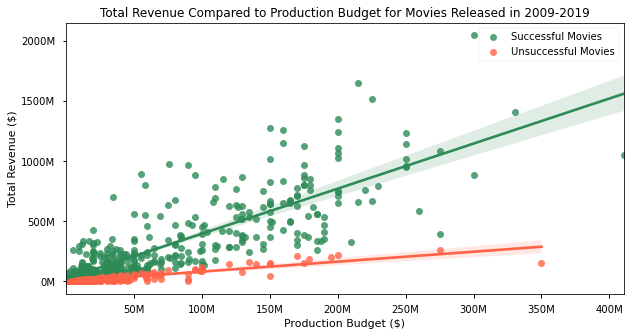

In [93]:
with plt.style.context('seaborn-notebook'):
    fig, ax = plt.subplots(figsize=(10,5))
    sns.regplot(x=imdb_tn_filtered['production_budget'], y=imdb_tn_filtered['worldwide_gross'], 
                color='seagreen', ax=ax, label='Successful Movies')
    sns.regplot(x=unsuccessful_df['production_budget'], y=unsuccessful_df['worldwide_gross'], 
                color='tomato', ax=ax, label='Unsuccessful Movies')
    ax.legend()
    ax.set_xlabel('Production Budget ($)')
    ax.set_ylabel('Total Revenue ($)')
    ax.set_title('Total Revenue Compared to Production Budget for Movies Released in 2009-2019')
    ax.yaxis.set_major_formatter(formatter)
    ax.xaxis.set_major_formatter(formatter);

As seen above, the production budget has more of a direct effect on the revenue generated by the movie. This may be due to factors such as having increased marketing budgets, or being able to show the movie in more countries compared to a lower budget production. The difference between the successful and unsuccessful movies in this relationship is also noteworthy. Even with lower quality productions, the revenue tends to increase with the budget but is ultimately stifled potentially due to the overall quality of the production.

#### Production Budget vs. Total Profit

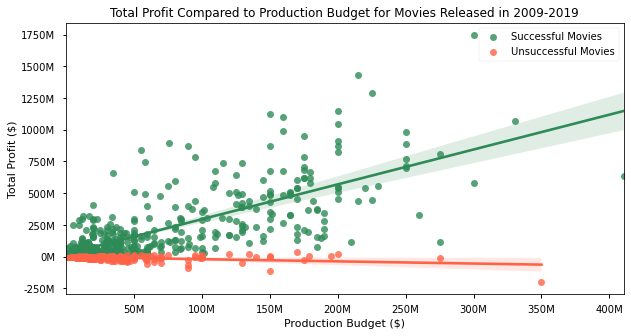

In [94]:
with plt.style.context('seaborn-notebook'):
    fig, ax = plt.subplots(figsize=(10,5))
    sns.regplot(x=imdb_tn_filtered['production_budget'], y=imdb_tn_filtered['profit'], color='seagreen', 
                ax=ax, label='Successful Movies')
    sns.regplot(x=unsuccessful_df['production_budget'], y=unsuccessful_df['profit'], color='tomato', 
                ax=ax, label='Unsuccessful Movies')
    ax.legend()
    ax.set_xlabel('Production Budget ($)')
    ax.set_ylabel('Total Profit ($)')
    ax.set_title('Total Profit Compared to Production Budget for Movies Released in 2009-2019')
    ax.yaxis.set_major_formatter(formatter)
    ax.xaxis.set_major_formatter(formatter);

The analysis between total profit and production budget shows a positive correlation for successful movies. As the production budget increases, the total profit amount tends to increase as well. For unsuccessful movies though the story is a little different. As the production budget increases, total profit tends to stay flat or even decrease. This is potentially due to the relationship we explored above between total revenue and production budget. Since the revenue numbers are stifled for unsuccessful movies, the higher the budget gets, the harder it is to turn a profit or even breakeven.

#### Our Recommendation for Microsoft

Our analysis showed that, ultimately, production budget affects revenue and profits pretty strongly while the movie ratings by the general public tend to not change with higher budgets. Microsoft should strategically think about the production budget and decide between the riskier approach or the safer approach. If they are okay with taking a riskier approach, then higher production budgets may return stronger numbers; however, if the movie is not successful, the overall production may lose more money.
Either way, we found that having higher budgets don't translate into moviegoers liking the movies better. Therefore, our recommendation would be for Microsoft to build their fanbase prior to producing movies with higher budgets since it is absolutely possible to produce quality movies with lower budgets as can be seen. This will allow for Microsoft Studios to be financially successful and will pave the path for a sustained growth and success.

#### Production Budget vs. Profit %

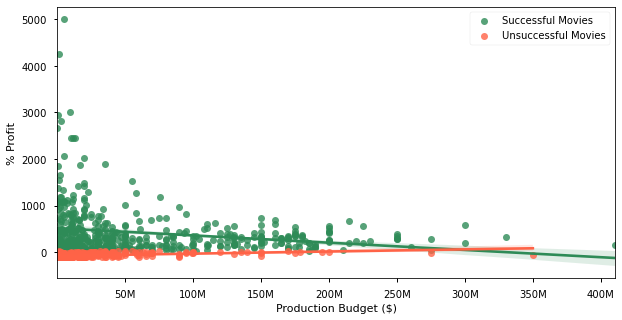

In [95]:
with plt.style.context('seaborn-notebook'):
    fig, ax = plt.subplots(figsize=(10,5))
    sns.regplot(x=imdb_tn_filtered['production_budget'], y=imdb_tn_filtered['profit %'], color='seagreen', 
                ax=ax, label='Successful Movies')
    sns.regplot(x=unsuccessful_df['production_budget'], y=unsuccessful_df['profit %'], color='tomato', 
                ax=ax, label='Unsuccessful Movies')
    ax.legend()
    ax.set_xlabel('Production Budget ($)')
    ax.set_ylabel('% Profit')
    ax.xaxis.set_major_formatter(formatter);

The relationship between % profit and production budget is an interesting one. It seems like as production budget increases the % profit decreases. This is potentially due to the movie having to perform even better than lower costing successful movies to offset the high amount of costs associated with the production. This insight can be valuable for Microsoft if their earnings are reported in terms of % profit to shareholders rather than total values.

## Conclusions

Even though the movie industry is a new frontier for Microsoft, it is an exciting industry filled with opportunities. To sum up, our analysis showed the following:

- Movies released in May and June historically performed better compared to other months in terms of revenue and profits.
- Even though the most produced genre for the past decade was Drama, most revenue and profit was generated by Adventure movies followed closely by Fantasy, Animation and Sci-Fi.
- The best genre in terms of % ROI was Horror.
- Higher production budgets don't translate into the public liking those movies more.
- Higher production budgets generated more revenue and profit for successful movies but unsuccessful movies with higher budgets ended up losing more money overall.

Given more time and information about what kinds of movies Microsoft would like to make, we would have wanted to analyze how much the actors, writers and directors affect the success of the movies and what the optimal cast would look like. It would also be fruitful to analyze the data by generations so that Microsoft's marketing team can optimize their efforts for specific generations depending on the target audience of their movies. Furthermore, analyzing the unsuccessful movies in more depth to find common traits among them for Microsoft to avoid would lower the financial risks associated with this industry. Lastly, we would collect more data to improve on the accuracy of these findings.